In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train_df = pd.read_csv("mnist_train.csv") #Load MNIST training and testing datasets
test_df  = pd.read_csv("mnist_test.csv")

## Basic Dataset Exploration

In [59]:
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

print("\nFirst 5 rows:")
print(train_df.head())

Training data shape: (60000, 785)
Testing data shape: (10000, 785)

First 5 rows:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


## Class Distribution

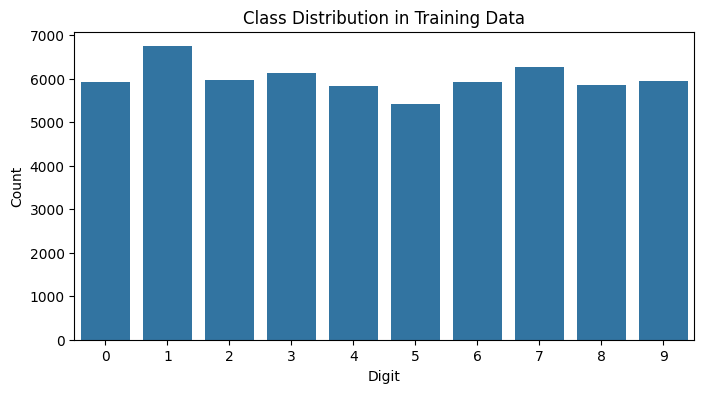

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(x=train_df["label"])
plt.title("Class Distribution in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

## Finindin number of Missing values

In [61]:
print("Missing values in training data:")
print(train_df.isnull().sum().sum())

print("Missing values in testing data:")
print(test_df.isnull().sum().sum())

Missing values in training data:
0
Missing values in testing data:
0


## Seperate features and Labels

In [62]:
X_train = train_df.drop("label", axis=1).values
Y_train = train_df["label"].values

X_test  = test_df.drop("label", axis=1).values
Y_test  = test_df["label"].values

## Normalise pixel values

In [63]:
#Normalize pixel values to range [0,1]
X_train = X_train / 255.0
X_test  = X_test / 255.0

## Display 5-10 sample images

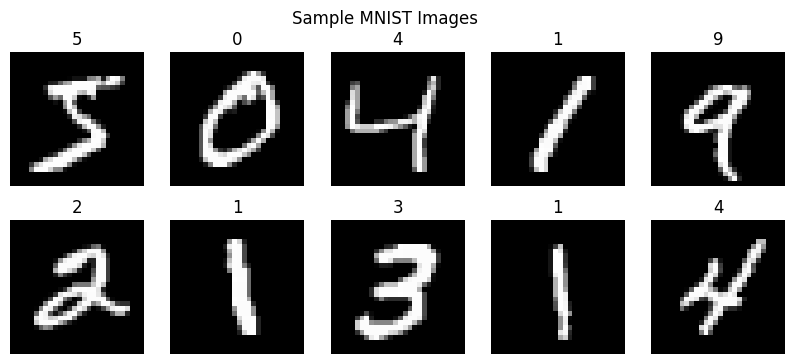

In [64]:
#Display sample images to understand data
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(Y_train[i])
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.show()

## PCA

In [65]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)

print("Shape after PCA:")
print(X_train.shape)
print(X_test.shape)

Shape after PCA:
(60000, 50)
(10000, 50)


## Model Implementation

**K-Nearest Neighbour**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)

print("KNN Accuracy:", knn_acc * 100)

KNN Accuracy: 97.48


**SVM**
**Linear Kernel**

In [67]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, Y_train)

svm_linear_pred = svm_linear.predict(X_test)
svm_linear_acc = accuracy_score(Y_test, svm_linear_pred)

print("SVM (Linear) Accuracy:", svm_linear_acc * 100)

SVM (Linear) Accuracy: 93.82000000000001


** SVM RBF Kernel**

In [68]:
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf.fit(X_train, Y_train)

svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_acc = accuracy_score(Y_test, svm_rbf_pred)

print("SVM (RBF) Accuracy:", svm_rbf_acc * 100)

SVM (RBF) Accuracy: 98.52


**Decision Tree**

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)

print("Decision Tree Accuracy:", dt_acc * 100)

Decision Tree Accuracy: 84.42


## Confusion Matrix

**SVM-RBF**

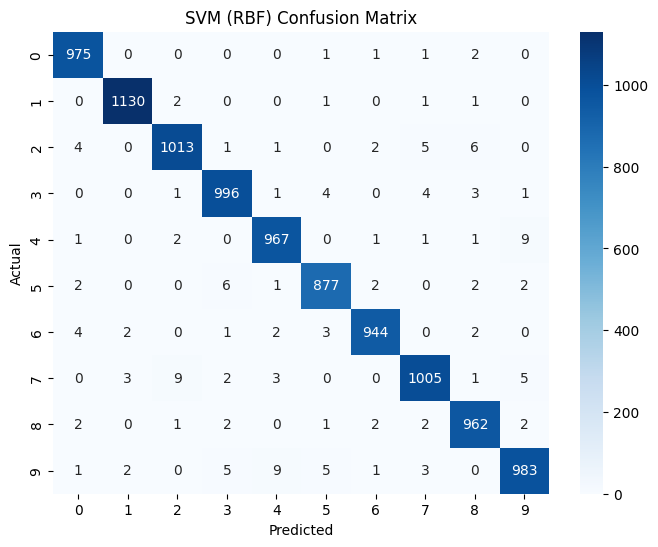

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, svm_rbf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM (RBF) Confusion Matrix")
plt.show()

**Decision tree**

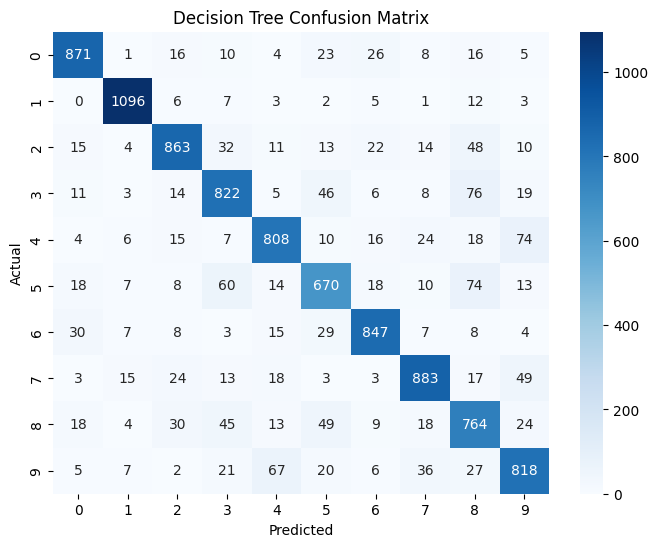

In [71]:
cm_dt = confusion_matrix(Y_test, dt_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Model comparison

In [72]:
print("Model Comparison:")
print(f"KNN Accuracy          : {knn_acc*100:.2f}%")
print(f"SVM Linear Accuracy   : {svm_linear_acc*100:.2f}%")
print(f"SVM RBF Accuracy      : {svm_rbf_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {dt_acc*100:.2f}%")

Model Comparison:
KNN Accuracy          : 97.48%
SVM Linear Accuracy   : 93.82%
SVM RBF Accuracy      : 98.52%
Decision Tree Accuracy: 84.42%


## Voting Ensemble

In [73]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm_rbf),
        ('dt', dt)
    ],
    voting='hard'
)

ensemble.fit(X_train, Y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_acc = accuracy_score(Y_test, ensemble_pred)
print("Voting Ensemble Accuracy:", ensemble_acc * 100)

Voting Ensemble Accuracy: 97.88


## **KNN From Scratch**

In [74]:
# Compute Euclidean distance between points
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [76]:
# Optimized KNN implementation using vectorized distance computation
class FastKNN:
    def __init__(self, k=5):# Initialize the number of nearest neighbors
        self.k = k

    def fit(self, X, y):
      #Store data and labels for training
      #KNN is a lazy algorithm so no training is required
        self.X_train = X
        self.y_train = y

    def predict(self, X):
      #Predict class labels for all test samples
        preds = []
        for x in X:
            # Vectorized distance computation
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_idx = np.argsort(distances)[:self.k]  #Identify indices of the closes training samples
            k_labels = self.y_train[k_idx]  #Extract labels of the k nearest neighbours

            labels, counts = np.unique(k_labels, return_counts=True)
            preds.append(labels[np.argmax(counts)])
        return np.array(preds)

In [77]:
knn_fast = FastKNN(k=5) ##Initialise the first knn with k=5
knn_fast.fit(X_train_pca, Y_train)

subset_size = 500 #use a subset of test data to reduce computational cost
knn_pred = knn_fast.predict(X_test_pca[:subset_size])

accuracy = np.mean(knn_pred == Y_test[:subset_size]) #computing accuracy
print("Fast KNN Accuracy:", accuracy * 100)

Fast KNN Accuracy: 97.39999999999999


## Confusion matrix for kNN

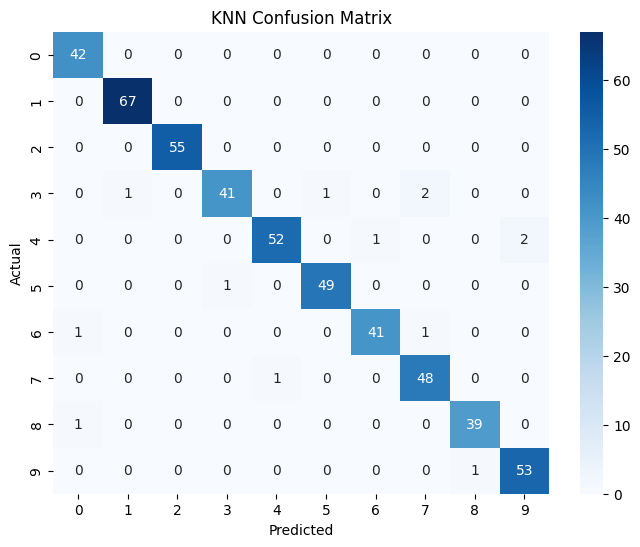

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(Y_test[:subset_size], knn_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

## **End of Project**